In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# **DATA EXPLORATION AND CLEANING**

In [2]:
MSB_df=pd.read_csv('LoanExport.csv') 
MSB_df = MSB_df.replace(r'^\s*$ ', np.nan, regex=True)

In [3]:
MSB_df

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,...,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,199902,N,202901,19740,0,1,O,73,17,...,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,199902,N,202901,29940,0,1,O,75,16,...,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,199902,N,202901,31084,0,1,O,76,14,...,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,199902,N,202901,35644,0,1,O,78,18,...,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291446,839,199903,N,202902,37964,0,1,O,60,32,...,19400,F199Q1220925,N,360,2,Ot,Other servicers,0,0,12
291447,840,200210,N,202904,35644,0,1,O,73,0,...,11600,F199Q1401332,P,319,2,Ot,Other servicers,0,0,53
291448,840,200304,N,202904,42044,0,1,O,73,31,...,92800,F199Q1401282,N,313,1,Ot,Other servicers,0,0,38
291449,845,199904,N,202903,37964,0,1,I,80,54,...,19300,F199Q1220924,P,360,2,Ot,Other servicers,0,0,32


In [4]:
MSB_df.ndim

2

In [5]:
MSB_df.shape

(291451, 28)

In [6]:
MSB_df.info

<bound method DataFrame.info of         CreditScore  FirstPaymentDate FirstTimeHomebuyer  MaturityDate    MSA  \
0                 0            199902                  N        202901  16974   
1                 0            199902                  N        202901  19740   
2                 0            199902                  N        202901  29940   
3                 0            199902                  N        202901  31084   
4                 0            199902                  N        202901  35644   
...             ...               ...                ...           ...    ...   
291446          839            199903                  N        202902  37964   
291447          840            200210                  N        202904  35644   
291448          840            200304                  N        202904  42044   
291449          845            199904                  N        202903  37964   
291450          849            199903                  N        202902  37964

In [7]:
MSB_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         291451 non-null  int64  
 1   FirstPaymentDate    291451 non-null  int64  
 2   FirstTimeHomebuyer  291451 non-null  object 
 3   MaturityDate        291451 non-null  int64  
 4   MSA                 291451 non-null  object 
 5   MIP                 291451 non-null  int64  
 6   Units               291451 non-null  int64  
 7   Occupancy           291451 non-null  object 
 8   OCLTV               291451 non-null  int64  
 9   DTI                 291451 non-null  int64  
 10  OrigUPB             291451 non-null  int64  
 11  LTV                 291451 non-null  int64  
 12  OrigInterestRate    291451 non-null  float64
 13  Channel             291451 non-null  object 
 14  PPM                 291451 non-null  object 
 15  ProductType         291451 non-nul

In [8]:
#Deleting unnecessary features
to_drop=['FirstPaymentDate','MaturityDate','MSA','Units','Occupancy','OrigUPB','Channel','ProductType',
         'PropertyState','PropertyType','PostalCode','LoanSeqNum','LoanPurpose','SellerName','ServicerName']
MSB_df.drop(to_drop, inplace=True, axis=1)

In [9]:
MSB_df.head()

,CreditScore,FirstTimeHomebuyer,MIP,OCLTV,DTI,LTV,OrigInterestRate,PPM,OrigLoanTerm,NumBorrowers,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,N,25,89,27,89,6.750,N,360,2,0,0,52
1,0,N,0,73,17,73,6.500,N,360,1,0,0,144
2,0,N,0,75,16,75,6.875,N,360,2,0,0,67
3,0,N,0,76,14,76,6.875,N,360,2,0,0,35
4,0,N,0,78,18,78,7.125,N,360,2,0,0,54


In [10]:
MSB_df.shape

(291451, 13)

In [11]:
MSB_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         291451 non-null  int64  
 1   FirstTimeHomebuyer  291451 non-null  object 
 2   MIP                 291451 non-null  int64  
 3   OCLTV               291451 non-null  int64  
 4   DTI                 291451 non-null  int64  
 5   LTV                 291451 non-null  int64  
 6   OrigInterestRate    291451 non-null  float64
 7   PPM                 291451 non-null  object 
 8   OrigLoanTerm        291451 non-null  int64  
 9   NumBorrowers        291451 non-null  object 
 10  EverDelinquent      291451 non-null  int64  
 11  MonthsDelinquent    291451 non-null  int64  
 12  MonthsInRepayment   291451 non-null  int64  
dtypes: float64(1), int64(9), object(3)
memory usage: 28.9+ MB


In [12]:
MSB_df['CreditScore'].describe()

count    291451.000000
mean        708.936991
std          68.408791
min           0.000000
25%         675.000000
50%         717.000000
75%         753.000000
max         849.000000
Name: CreditScore, dtype: float64

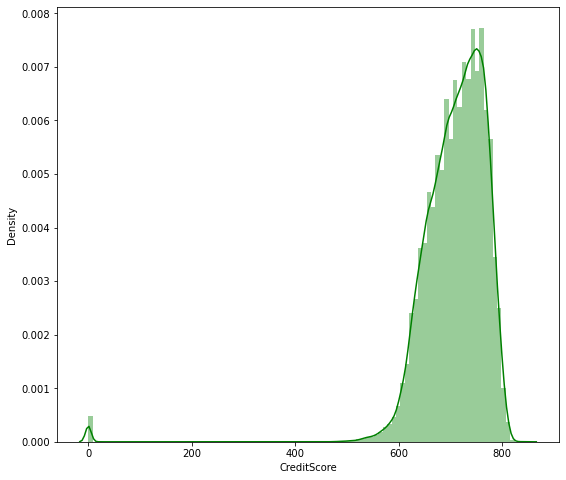

In [13]:
#Checking mean and outlier
plt.figure(figsize=(9, 8)) 
sns.distplot(MSB_df['CreditScore'], color='g', bins=100, hist_kws={'alpha': 0.4});

Here we can see the some of the value is 0 

In [14]:
#Investigate the unique values in the column
MSB_df.CreditScore.unique()

array([  0, 335, 342, 363, 366, 370, 375, 391, 396, 445, 462, 466, 471,
       476, 477, 478, 479, 481, 482, 483, 485, 486, 487, 489, 490, 491,
       492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504,
       505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517,
       518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530,
       531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543,
       544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556,
       557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569,
       570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582,
       583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595,
       596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608,
       609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621,
       622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634,
       635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 64

In [15]:
# CreditScore contains a 0 which the data definition states is actually 850.
# Let's convert all 0's to 850
MSB_df['CreditScore'] = np.where(MSB_df['CreditScore'] == 0,850 , MSB_df['CreditScore'])
MSB_df.CreditScore.unique()

array([850, 335, 342, 363, 366, 370, 375, 391, 396, 445, 462, 466, 471,
       476, 477, 478, 479, 481, 482, 483, 485, 486, 487, 489, 490, 491,
       492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504,
       505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517,
       518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530,
       531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543,
       544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556,
       557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569,
       570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582,
       583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595,
       596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608,
       609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621,
       622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634,
       635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 64

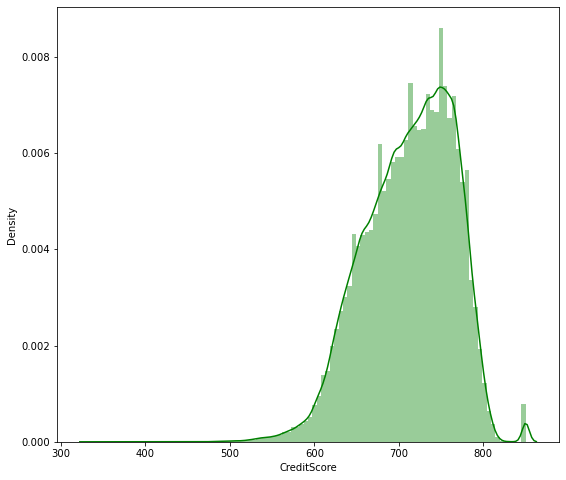

In [16]:
#Now after the replace 0 with 850.
plt.figure(figsize=(9, 8)) 
sns.distplot(MSB_df['CreditScore'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [17]:
#Numerical data distribution
df_num = MSB_df.select_dtypes(include = 'number')
df_num.head()


,CreditScore,MIP,OCLTV,DTI,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,850,25,89,27,89,6.750,360,0,0,52
1,850,0,73,17,73,6.500,360,0,0,144
2,850,0,75,16,75,6.875,360,0,0,67
3,850,0,76,14,76,6.875,360,0,0,35
4,850,0,78,18,78,7.125,360,0,0,54


In [18]:
df_num.tail()

,CreditScore,MIP,OCLTV,DTI,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment
291446,839,0,60,32,60,7.000,360,0,0,12
291447,840,0,73,0,73,6.375,319,0,0,53
291448,840,0,73,31,73,5.625,313,0,0,38
291449,845,0,80,54,80,7.000,360,0,0,32
291450,849,0,47,29,47,7.000,360,0,0,29


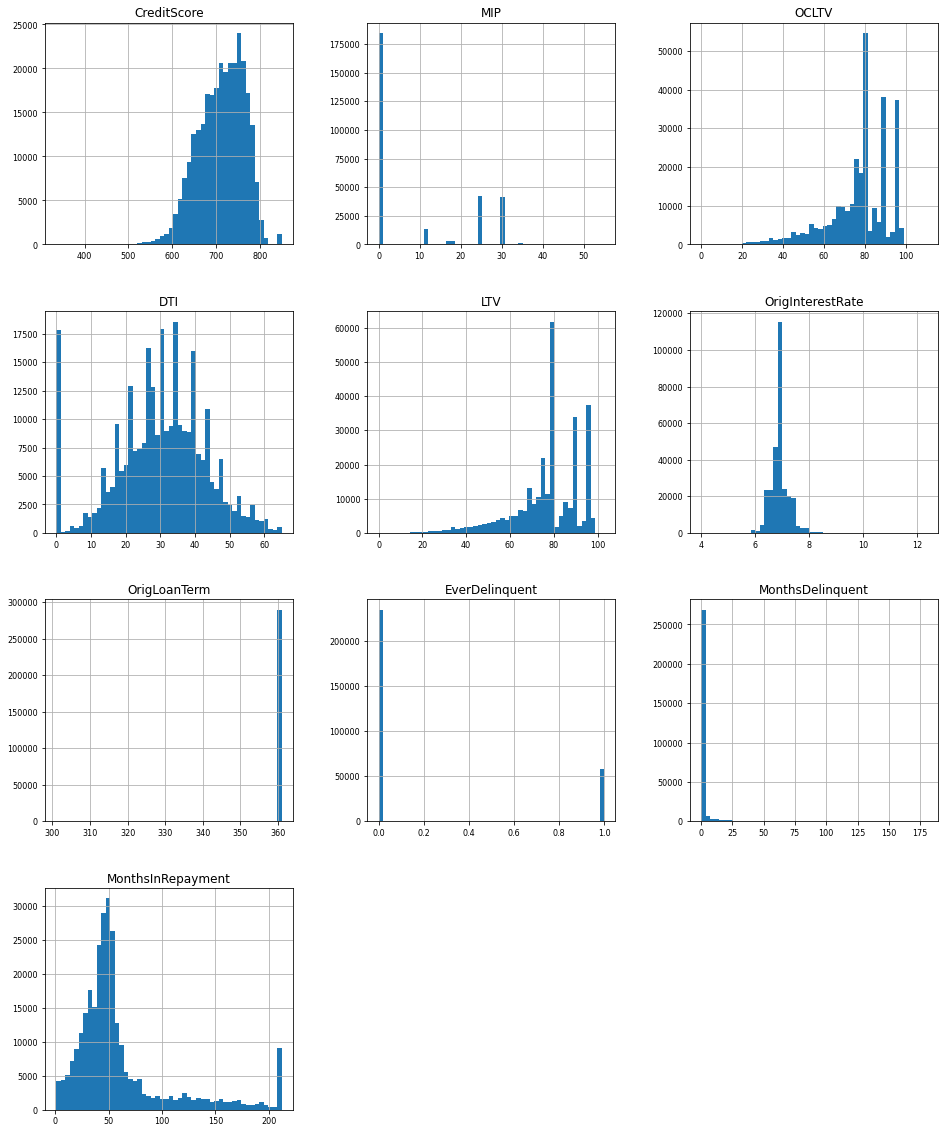

In [19]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [20]:
df_num.describe()

,CreditScore,MIP,OCLTV,DTI,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment
count,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000
mean,712.404641,9.216685,76.960529,30.033453,76.937986,6.926547,359.835375,0.197848,1.837729,60.805291
std,51.947505,12.648273,15.236154,13.203974,15.225298,0.343541,2.286939,0.398378,8.809392,46.142599
min,335.000000,0.000000,0.000000,0.000000,0.000000,4.000000,301.000000,0.000000,0.000000,1.000000
25%,676.000000,0.000000,70.000000,22.000000,70.000000,6.750000,360.000000,0.000000,0.000000,34.000000
50%,718.000000,0.000000,80.000000,31.000000,80.000000,6.875000,360.000000,0.000000,0.000000,48.000000
75%,753.000000,25.000000,90.000000,39.000000,90.000000,7.125000,360.000000,0.000000,0.000000,63.000000
max,850.000000,55.000000,110.000000,65.000000,103.000000,12.350000,361.000000,1.000000,180.000000,212.000000


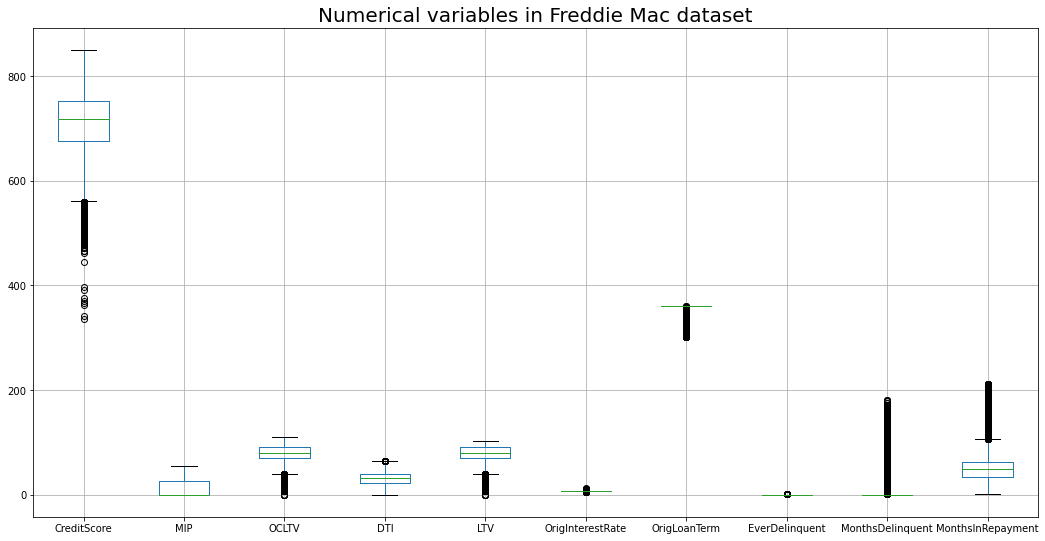

In [21]:
#Boxplot of numerical variables
plt.figure(figsize=(18,9))
df_num.boxplot()
plt.title("Numerical variables in Freddie Mac dataset", fontsize=20)
plt.show()

In [22]:
#Ckecking Null Values
df_num.isnull().sum()==True

CreditScore          False
MIP                  False
OCLTV                False
DTI                  False
LTV                  False
OrigInterestRate     False
OrigLoanTerm         False
EverDelinquent       False
MonthsDelinquent     False
MonthsInRepayment    False
dtype: bool

There are no missing values in this dataset

In [23]:
df_num_corr=df_num.corr()
df_num_corr

,CreditScore,MIP,OCLTV,DTI,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment
CreditScore,1.000000,-0.198677,-0.238649,-0.137809,-0.238920,-0.135855,-0.012236,-0.260214,-0.184442,0.003528
MIP,-0.198677,1.000000,0.694789,0.111603,0.695888,0.124544,0.014834,0.059993,0.051204,-0.087802
OCLTV,-0.238649,0.694789,1.000000,0.114853,0.999470,0.095268,0.018560,0.065528,0.059811,-0.094299
DTI,-0.137809,0.111603,0.114853,1.000000,0.114468,0.105216,0.028005,0.062109,0.040830,-0.007732
LTV,-0.238920,0.695888,0.999470,0.114468,1.000000,0.095520,0.018477,0.065735,0.059930,-0.094596
OrigInterestRate,-0.135855,0.124544,0.095268,0.105216,0.095520,1.000000,0.010794,0.060418,0.051706,-0.120378
OrigLoanTerm,-0.012236,0.014834,0.018560,0.028005,0.018477,0.010794,1.000000,0.010348,0.006567,0.016591
EverDelinquent,-0.260214,0.059993,0.065528,0.062109,0.065735,0.060418,0.010348,1.000000,0.420048,0.232497
MonthsDelinquent,-0.184442,0.051204,0.059811,0.040830,0.059930,0.051706,0.006567,0.420048,1.000000,0.306631
MonthsInRepayment,0.003528,-0.087802,-0.094299,-0.007732,-0.094596,-0.120378,0.016591,0.232497,0.306631,1.000000


Correlation

In [24]:
#Now we'll try to find which features are strongly correlated with CreditScore
df_num_corr = df_num.corr()['CreditScore'][:-1] # -1 because the latest row is SalePrice
golden_features_list = df_num_corr[abs(df_num_corr) > 0.05].sort_values(ascending=False)
print("There is {} strongly correlated values with CreditScore:\n{}".format(len(golden_features_list), golden_features_list))


There is 8 strongly correlated values with CreditScore:
CreditScore         1.000000
OrigInterestRate   -0.135855
DTI                -0.137809
MonthsDelinquent   -0.184442
MIP                -0.198677
OCLTV              -0.238649
LTV                -0.238920
EverDelinquent     -0.260214
Name: CreditScore, dtype: float64


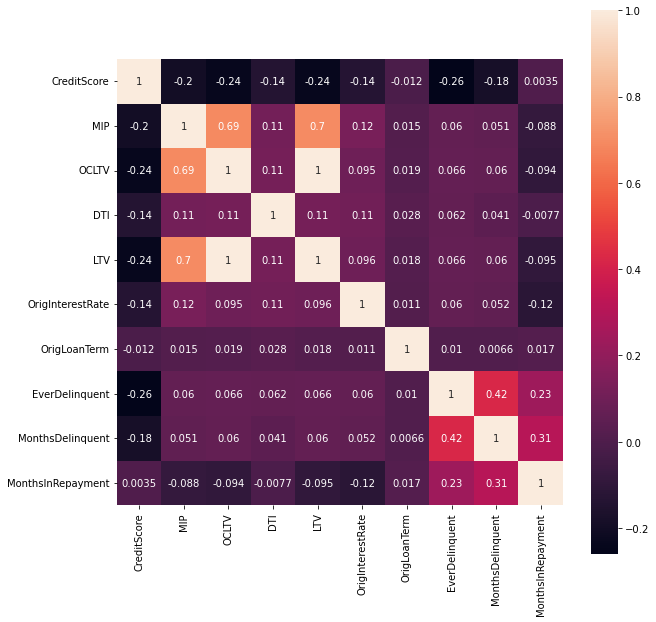

In [25]:
#HeatMap
plt.figure(figsize=(10, 10))
df_num_corr = df_num.corr()
sns.heatmap(df_num_corr, annot=True, square=True)
plt.yticks(rotation=0)
plt.show()

# **Handling Categorical Data**

In [26]:
# Find the values in FirstTimeHomebuyer column
MSB_df.FirstTimeHomebuyer.unique()

array(['N', 'X', 'Y'], dtype=object)

In [27]:
# FirstTimeHomebuyer contains X's which stand for unknowns, i.e. Nulls. 
# Need to remove all rows that do not have a valid answer, Y/N, as they are not useful to our research.
MSB_df = MSB_df[MSB_df.FirstTimeHomebuyer != 'X']
MSB_df.FirstTimeHomebuyer.unique()

array(['N', 'Y'], dtype=object)

In [28]:
# Count values in FirstTimeHomebuyer
MSB_df['FirstTimeHomebuyer'].value_counts()

N    184154
Y     29282
Name: FirstTimeHomebuyer, dtype: int64

In [29]:
# Rename FirstTimeHomebuyer to IsFirstTime
MSB_df = MSB_df.rename(columns = {'FirstTimeHomebuyer':'IsFirstTime'})
# Convert Y/N to 1 or 0 and then count values again to ensure they match
MSB_df['IsFirstTime'] = np.where(MSB_df['IsFirstTime'] == 'Y',1,0)
MSB_df['IsFirstTime'].value_counts()

0    184154
1     29282
Name: IsFirstTime, dtype: int64

In [30]:
# Find the values in MIP column
MSB_df.MIP.unique()

array([25,  0, 30, 12, 35, 29, 17, 18, 20, 22,  6, 14, 33, 16, 52, 36, 28,
       11, 45, 27, 10, 50, 47,  7, 24, 15, 37, 32, 26,  1, 13, 21, 23, 55,
        4], dtype=int64)

In [31]:
MSB_df.head()

,CreditScore,IsFirstTime,MIP,OCLTV,DTI,LTV,OrigInterestRate,PPM,OrigLoanTerm,NumBorrowers,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,850,0,25,89,27,89,6.750,N,360,2,0,0,52
1,850,0,0,73,17,73,6.500,N,360,1,0,0,144
2,850,0,0,75,16,75,6.875,N,360,2,0,0,67
3,850,0,0,76,14,76,6.875,N,360,2,0,0,35
4,850,0,0,78,18,78,7.125,N,360,2,0,0,54


<Figure size 864x1440 with 0 Axes>

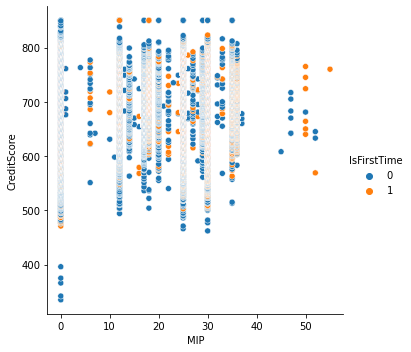

In [32]:
#Bivariate Analysis
plt.figure(figsize=(12,20))
sns.relplot(x='MIP', y='CreditScore', hue='IsFirstTime', data=MSB_df)

In [33]:
#Handle PPM
MSB_df['PPM'].value_counts()

N    204660
X      4895
Y      3881
Name: PPM, dtype: int64

In [34]:
MSB_df = MSB_df[MSB_df.PPM != 'X']
MSB_df.PPM.unique()

array(['N', 'Y'], dtype=object)

In [35]:
MSB_df['PPM'].value_counts()

N    204660
Y      3881
Name: PPM, dtype: int64

In [36]:
MSB_df['PPM'] = np.where(MSB_df['PPM'] == 'Y',1,0)
MSB_df['PPM'].value_counts()

0    204660
1      3881
Name: PPM, dtype: int64

In [37]:
# Find values in OCLTV
MSB_df.OCLTV.unique()
# The OCLTV values check out here.

array([ 89,  73,  75,  76,  78,  90,  95,  80,  77,  85,  93,  70,  74,
        79,  72,  62,  44,  32,  64,  91,  53,  69,  60,  54,  52,  84,
        68,  36,  55,  96,  97,  46,  58,  63,  83,  94,  48,  50,  51,
        67,  86,  81,  66,  71,  82,  88,  26,  59,  57,  61,  87,  30,
        24,  42,  65,  31, 100,   7,  38,  16,  92,  40,  35,  34,  56,
        39,  22,  37,  28,  43,  47,  49,  98,  29,  25,  45,  33,  41,
       103,  18,  23,  20,  15, 102, 101,  14,  21,  27, 105,  19,  10,
         0, 104,  17, 110,   8,  99,  12,   6,  13,  11,   9], dtype=int64)

In [38]:
# Find values in DTI
MSB_df.DTI.unique()
# The DTI values check out here.

array([27, 17, 16, 14, 18, 40, 21, 19, 38, 23, 28, 29, 15, 43, 25, 24, 45,
       26, 20, 35, 39, 33, 48, 30, 31, 22, 56, 32, 12,  6, 37, 36, 42, 34,
       11, 41,  8, 44, 55,  0, 51, 10,  7, 47,  9, 13, 65, 54, 53, 57, 46,
        5, 50, 59, 49,  3, 52, 64,  4, 60,  2, 58,  1, 61, 62, 63],
      dtype=int64)

In [39]:
# Find values in LTV
MSB_df.LTV.unique()
# The LTV values check out here.

array([ 89,  73,  75,  76,  78,  90,  95,  80,  77,  85,  93,  70,  74,
        79,  72,  62,  44,  32,  64,  91,  53,  69,  60,  54,  52,  84,
        68,  36,  55,  96,  97,  46,  58,  63,  83,  94,  48,  50,  51,
        67,  86,  81,  66,  71,  82,  88,  26,  59,  57,  61,  87,  30,
        24,  42,  65,  31,   7,  38,  16,  92,  40,  35,  34,  56,  39,
        22,  37,  28,  43,  47, 100,  49,  98,  29,  25,  45,  33,  41,
        18,  23,  20,  15,  14,  21,  27,  19,  10,   0,  17,   8,  12,
         6,  13,  11,   9], dtype=int64)

In [40]:
# Find values in OrigInterestRate
MSB_df.OrigInterestRate.unique()
# The values check out here since we see that pandas imported this column as a float type.

array([ 6.75 ,  6.5  ,  6.875,  7.125,  7.25 ,  6.625,  7.75 ,  7.   ,
        7.2  ,  7.5  ,  7.875,  6.25 ,  8.125,  7.625,  7.15 ,  7.375,
        6.375,  8.75 ,  7.05 ,  6.95 ,  8.   ,  8.625,  8.375,  8.5  ,
        6.125,  6.   ,  5.875,  8.25 ,  8.99 ,  5.625,  9.   ,  5.125,
        5.25 ,  9.125,  6.99 ,  5.375,  8.365,  8.875,  6.975,  7.3  ,
        7.313,  9.25 ,  5.75 ,  7.85 ,  8.695,  4.875,  7.775,  7.29 ,
        7.405,  9.5  ,  7.13 ,  7.1  ,  5.99 ,  6.999,  7.09 ,  9.375,
        7.025,  7.58 , 10.5  ,  7.445,  6.85 ,  6.925,  6.9  ,  8.37 ,
        7.675,  9.675,  7.475,  9.625,  7.17 ,  8.7  ,  8.9  , 10.   ,
        9.75 ,  5.5  ,  6.62 ,  7.325, 10.375,  7.4  , 10.85 ,  7.245,
       11.5  ,  6.87 ,  7.65 ,  7.28 ,  7.48 ,  6.88 ,  8.45 ,  6.895,
        5.   ,  7.49 ,  6.8  ,  6.63 ,  8.05 ,  7.275,  7.225,  7.075,
        8.8  ,  9.95 ,  7.35 ,  7.23 ,  7.175,  7.91 ,  7.575,  7.425,
        7.33 , 10.625,  7.14 ,  7.12 ,  7.24 ,  7.7  ,  6.4  ,  6.3  ,
      

In [41]:
# Find values in OrigLoanTerm
MSB_df.OrigLoanTerm.unique()
# The OrigLoanTerm values check out here.

array([360, 306, 335, 322, 327, 358, 355, 356, 354, 346, 344, 313, 316,
       353, 319, 332, 336, 338, 312, 328, 351, 333, 359, 331, 337, 334,
       345, 357, 330, 350, 341, 343, 348, 325, 326, 347, 352, 329, 339,
       309, 317, 349, 342, 304, 324, 310, 340, 301, 305, 315, 323, 321,
       320, 314, 318, 308, 303, 307, 361, 302, 311], dtype=int64)

In [42]:
# Find values in EverDelinquent
MSB_df.EverDelinquent.unique()
# The EverDelinquent values check out here.

array([0, 1], dtype=int64)

In [43]:
# Find values in MonthsInRepayment
MSB_df.MonthsInRepayment.unique()
# The MonthsInRepayment values check out here.

array([ 52, 144,  67,  35,  54,  42,  44, 212,  37,  47,  53,  55,  66,
        26,  38,  36,  39,  40,  11, 176,  46, 197, 210,  56, 118,  63,
        24,  28,  91,  50,  22, 211, 199,  23,  30, 125,  41,  76,  49,
        18,  19,  43,  60,  83,  95,  29,  45,  13,   6,  48,  62,  14,
        15, 111,  51,  17,  75,  58,  27,  10,  31, 133, 165, 156,  33,
        68, 205,  57, 159,  81, 191, 194, 114,  59, 100, 134, 128,  71,
         7,  65,  74,  64,  79, 174, 195, 151,  34, 149,  21,  12, 137,
       130,  70, 173, 166,  61, 160,  69,  20, 178,   3,  72, 147,   2,
        32, 164, 139, 108, 148,  92, 209, 102,  87,  73, 123,  16, 142,
         1, 172, 109, 141, 175, 103, 168,   5, 155, 177, 158, 138,  25,
       110,  84, 136,   8, 121, 179,   4, 161, 157, 150,  80, 170,  77,
         9, 183,  93, 143, 162, 126,  89, 208, 184,  82, 145, 117, 101,
       122, 107, 193,  85,  78, 169, 104, 131, 140, 163, 112, 206, 135,
       132, 124, 186, 127, 189, 190, 198, 192, 167, 146, 119,  9

In [44]:
# Create new variable for Credit Range since that is commonly what is looked at in the industry.
# New values = Poor (0-650), Fair (650-700), Good (700-750), Excellent (750-900)
MSB_df['CreditRange'] = pd.cut(MSB_df.CreditScore,[550,650,700,750,1e6],4,labels=[1,2,3,4])
MSB_df.CreditRange.unique()

[4, NaN, 1, 2, 3]
Categories (4, int64): [1 < 2 < 3 < 4]

In [45]:
MSB_df['CreditRange'].value_counts()

3    71011
4    55852
2    53526
1    27641
Name: CreditRange, dtype: int64

In [46]:
# Create new variable for LTV Range
MSB_df['LTV_range'] = pd.cut(MSB_df.LTV,[0,25,50,1000],3,labels=['Low','Medium','High'])
MSB_df.LTV_range.unique()

['High', 'Medium', 'Low', NaN]
Categories (3, object): ['Low' < 'Medium' < 'High']

In [47]:
# We get a NaN null return as a possible value
# Checking to ensure this is accurate
print('Is there a Null value in LTV?', MSB_df['LTV_range'].isnull().values.any())
print('Dataframe shape:', MSB_df.shape)
MSB_df['LTV_range'].value_counts()

Is there a Null value in LTV? True
Dataframe shape: (208541, 15)


High      194439
Medium     12788
Low         1311
Name: LTV_range, dtype: int64

Here we can 3 NaN values are present so, we need need to remove or fill with with 0.

In [48]:
# We need to find where these 3 Nan values are.
inds = pd.isnull(MSB_df).any(1)
pd.isnull(MSB_df).any(1).values

array([False, False, False, ..., False, False, False])

In [49]:
# Drop the specific rows with Nan for LTV_range as this will be an issue later on.
MSB_df = MSB_df[MSB_df['LTV_range'].notna()]
print('Is there a Null value in LTV?', MSB_df['LTV_range'].isnull().values.any())
print('Dataframe shape:', MSB_df.shape)
MSB_df['LTV_range'].value_counts()

Is there a Null value in LTV? False
Dataframe shape: (208538, 15)


High      194439
Medium     12788
Low         1311
Name: LTV_range, dtype: int64

In [50]:
# Create new variable Repay range
MSB_df['Repay_range'] = pd.cut(MSB_df.MonthsInRepayment,[0,48,96,144,192,240],5,
                           labels=['0-4yrs','4-8yrs','8-12yrs', '12-16yrs', '16-20yrs'])
print('Dataframe shape:', MSB_df.shape)
print('Repay_range values:', MSB_df.Repay_range.unique())
MSB_df['Repay_range'].value_counts()

Dataframe shape: (208538, 16)
Repay_range values: ['4-8yrs', '8-12yrs', '0-4yrs', '16-20yrs', '12-16yrs']
Categories (5, object): ['0-4yrs' < '4-8yrs' < '8-12yrs' < '12-16yrs' < '16-20yrs']


0-4yrs      106636
4-8yrs       71914
8-12yrs      13345
12-16yrs      8539
16-20yrs      8104
Name: Repay_range, dtype: int64

In [51]:
# Final check of our dataframe before moving on.
MSB_df = MSB_df.dropna()
print('Dataframe shape:', MSB_df.shape)
print('Are there any null values in our dataframe (T/F)?', MSB_df.isnull().values.any())
MSB_df.info()

Dataframe shape: (208027, 16)
Are there any null values in our dataframe (T/F)? False
<class 'pandas.core.frame.DataFrame'>
Int64Index: 208027 entries, 0 to 291450
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   CreditScore        208027 non-null  int64   
 1   IsFirstTime        208027 non-null  int32   
 2   MIP                208027 non-null  int64   
 3   OCLTV              208027 non-null  int64   
 4   DTI                208027 non-null  int64   
 5   LTV                208027 non-null  int64   
 6   OrigInterestRate   208027 non-null  float64 
 7   PPM                208027 non-null  int32   
 8   OrigLoanTerm       208027 non-null  int64   
 9   NumBorrowers       208027 non-null  object  
 10  EverDelinquent     208027 non-null  int64   
 11  MonthsDelinquent   208027 non-null  int64   
 12  MonthsInRepayment  208027 non-null  int64   
 13  CreditRange        208027 non-null  category
 14

<AxesSubplot:xlabel='LTV_range', ylabel='count'>

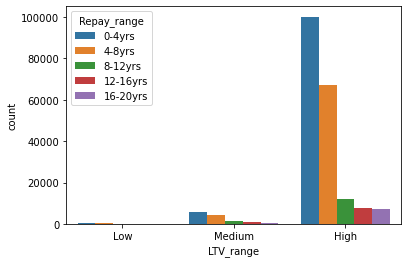

In [52]:
sns.countplot(data=MSB_df, x='LTV_range', hue='Repay_range')

# **Visualize Results**

In [53]:
MSB_df.head()

,CreditScore,IsFirstTime,MIP,OCLTV,DTI,LTV,OrigInterestRate,PPM,OrigLoanTerm,NumBorrowers,EverDelinquent,MonthsDelinquent,MonthsInRepayment,CreditRange,LTV_range,Repay_range
0,850,0,25,89,27,89,6.750,0,360,2,0,0,52,4,High,4-8yrs
1,850,0,0,73,17,73,6.500,0,360,1,0,0,144,4,High,8-12yrs
2,850,0,0,75,16,75,6.875,0,360,2,0,0,67,4,High,4-8yrs
3,850,0,0,76,14,76,6.875,0,360,2,0,0,35,4,High,0-4yrs
4,850,0,0,78,18,78,7.125,0,360,2,0,0,54,4,High,4-8yrs


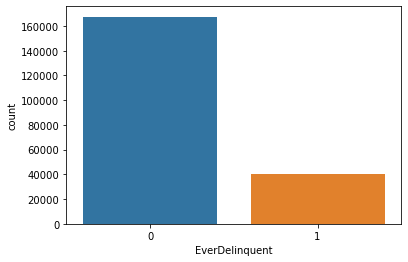

In [54]:
# visualize the target variable
g = sns.countplot(MSB_df['EverDelinquent'])
g.set_xticklabels(['0','1'])
plt.show()

In [55]:
#Value Count
MSB_df['EverDelinquent'].value_counts()

0    167530
1     40497
Name: EverDelinquent, dtype: int64

array([[<AxesSubplot:title={'center':'EverDelinquent'}>,
        <AxesSubplot:title={'center':'MonthsDelinquent'}>]], dtype=object)

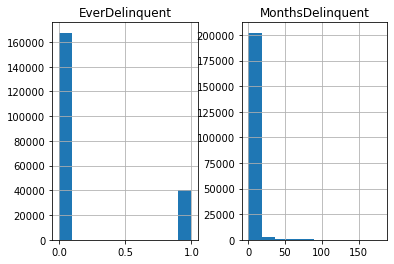

In [56]:
MSB_df.hist(column=['EverDelinquent','MonthsDelinquent'])

In [57]:
MSB_df['MonthsDelinquent'].value_counts()

0      167530
1       16377
2        5279
3        2705
4        1683
        ...  
138         1
180         1
150         1
163         1
154         1
Name: MonthsDelinquent, Length: 172, dtype: int64

Here the target Variables are EverDelinquent and MonthsDelinquent, 
We can see here the dataset is imbalance

In [58]:
#Now convert LTV_range into numeric
LTV_range_dict={'High':2,'Medium':1,'Low':0}
MSB_df['LTV_range']=MSB_df.LTV_range.map(LTV_range_dict)
MSB_df.head(3)

,CreditScore,IsFirstTime,MIP,OCLTV,DTI,LTV,OrigInterestRate,PPM,OrigLoanTerm,NumBorrowers,EverDelinquent,MonthsDelinquent,MonthsInRepayment,CreditRange,LTV_range,Repay_range
0,850,0,25,89,27,89,6.750,0,360,2,0,0,52,4,2,4-8yrs
1,850,0,0,73,17,73,6.500,0,360,1,0,0,144,4,2,8-12yrs
2,850,0,0,75,16,75,6.875,0,360,2,0,0,67,4,2,4-8yrs


In [59]:
#Convert Repay_range into numeric
Repay_range_dict={'0-4yrs':0,'4-8yrs':2,'8-12yrs':3, '12-16yrs':4, '16-20yrs':5}
MSB_df['Repay_range']=MSB_df.Repay_range.map(Repay_range_dict)
MSB_df.head(2)

,CreditScore,IsFirstTime,MIP,OCLTV,DTI,LTV,OrigInterestRate,PPM,OrigLoanTerm,NumBorrowers,EverDelinquent,MonthsDelinquent,MonthsInRepayment,CreditRange,LTV_range,Repay_range
0,850,0,25,89,27,89,6.75,0,360,2,0,0,52,4,2,2
1,850,0,0,73,17,73,6.50,0,360,1,0,0,144,4,2,3


In [60]:
MSB_df.NumBorrowers.unique()

array(['2', '1', 'X '], dtype=object)

In [61]:
MSB_df['NumBorrowers'] = MSB_df['NumBorrowers'].fillna(0)
MSB_df['NumBorrowers'] = MSB_df['NumBorrowers'].replace('X ', 0)

In [62]:
MSB_df.NumBorrowers.value_counts()

2    132583
1     75271
0       173
Name: NumBorrowers, dtype: int64

In [63]:
#Drop MonthsDelinquent Because it is highly correlated with EverDelinquent
MSB_df.drop('MonthsDelinquent',inplace=True,axis=1)

In [64]:
#Convert category data into float 
MSB_df["CreditRange"] = MSB_df["CreditRange"].astype(int)
MSB_df["LTV_range"] = MSB_df["LTV_range"].astype(int)
MSB_df["Repay_range"] = MSB_df["Repay_range"].astype(int)
MSB_df["NumBorrowers"] = MSB_df["NumBorrowers"].astype(int)

In [65]:
MSB_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208027 entries, 0 to 291450
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CreditScore        208027 non-null  int64  
 1   IsFirstTime        208027 non-null  int32  
 2   MIP                208027 non-null  int64  
 3   OCLTV              208027 non-null  int64  
 4   DTI                208027 non-null  int64  
 5   LTV                208027 non-null  int64  
 6   OrigInterestRate   208027 non-null  float64
 7   PPM                208027 non-null  int32  
 8   OrigLoanTerm       208027 non-null  int64  
 9   NumBorrowers       208027 non-null  int32  
 10  EverDelinquent     208027 non-null  int64  
 11  MonthsInRepayment  208027 non-null  int64  
 12  CreditRange        208027 non-null  int32  
 13  LTV_range          208027 non-null  int32  
 14  Repay_range        208027 non-null  int32  
dtypes: float64(1), int32(6), int64(8)
memory usage: 28.

In [66]:
MSB_df.head(2)

,CreditScore,IsFirstTime,MIP,OCLTV,DTI,LTV,OrigInterestRate,PPM,OrigLoanTerm,NumBorrowers,EverDelinquent,MonthsInRepayment,CreditRange,LTV_range,Repay_range
0,850,0,25,89,27,89,6.75,0,360,2,0,52,4,2,2
1,850,0,0,73,17,73,6.50,0,360,1,0,144,4,2,3


**Handling Imbalance Dataset:**

**Balance the target variable and dataset using SMOTE method**

In [67]:
#Input and target variables
x=MSB_df.drop('EverDelinquent',axis=1)
y=MSB_df.EverDelinquent

#Training and test dataset split
#from sklearn.model_selection import train_test_split
#x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=4)

In [68]:
print(x.shape)
print(y.shape)

(208027, 14)
(208027,)


#### #To handle ValueError : Could not convert into float:'X '
#### #convert X into dataframe
X_pd = pd.DataFrame(data=x)
#### #replace all instances of URC with 0 
X_replace = X_pd.replace('X ',0, regex=True)
#### #convert it back to numpy array
X_np = X_replace.values
#### #set the object type as float
X_fa = X_np.astype(float)

In [69]:
y

0         0
1         0
2         0
3         0
4         0
         ..
291446    0
291447    0
291448    0
291449    0
291450    0
Name: EverDelinquent, Length: 208027, dtype: int64

In [70]:
#Using SMOTE(Synthetic Minority Oversampling Technique)
# import library
from collections import Counter
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
#x_smote, y_smote = smote.fit_resample(x_train, y_train)
x_smote, y_smote = smote.fit_resample(x, y)

print("Original dataset shape {}".format(Counter(y)))
print("Resample dataset shape {}".format(Counter(y_smote)))

Original dataset shape Counter({0: 167530, 1: 40497})
Resample dataset shape Counter({0: 167530, 1: 167530})


In [71]:
y_smote

0         0
1         0
2         0
3         0
4         0
         ..
335055    1
335056    1
335057    1
335058    1
335059    1
Name: EverDelinquent, Length: 335060, dtype: int64

In [72]:
y_smote.shape

(335060,)

In [73]:
x_smote

,CreditScore,IsFirstTime,MIP,OCLTV,DTI,LTV,OrigInterestRate,PPM,OrigLoanTerm,NumBorrowers,MonthsInRepayment,CreditRange,LTV_range,Repay_range
0,850,0,25,89,27,89,6.750000,0,360,2,52,4,2,2
1,850,0,0,73,17,73,6.500000,0,360,1,144,4,2,3
2,850,0,0,75,16,75,6.875000,0,360,2,67,4,2,2
3,850,0,0,76,14,76,6.875000,0,360,2,35,4,2,0
4,850,0,0,78,18,78,7.125000,0,360,2,54,4,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335055,632,0,0,80,17,80,6.931141,0,360,1,64,1,2,2
335056,619,0,0,63,43,63,7.215182,0,360,2,190,1,2,4
335057,695,0,0,39,37,39,6.629781,0,360,2,119,2,1,3
335058,622,1,0,95,29,95,6.815714,0,360,1,49,1,2,2


In [74]:
x_smote.shape

(335060, 14)

In [75]:
#Now Concat the x_smote and y_smote and make balance dataframe
df_smote_over = pd.concat([pd.DataFrame(x_smote,columns=['CreditScore','IsFirstTime','MIP','OCLTV','DTI','LTV','OrigInterestRate','PPM','OrigLoanTerm','NumBorrowers','MonthsInRepayment','CreditRange','LTV_range','Repay_range']), pd.DataFrame(y_smote, columns=['EverDelinquent'])], axis=1)

###### #To Converting everyColumn of balance dataset in int datatype
df_smote_over=df_smote_over.astype(int)

In [76]:
#converting EveryColumn into int datatype except "OrigInterestRate"
for x in df_smote_over.columns:
  if(x=="OrigInterestRate"):
    continue
  df_smote_over[x]=df_smote_over[x].astype(int)

In [77]:
df_smote_over.head()

,CreditScore,IsFirstTime,MIP,OCLTV,DTI,LTV,OrigInterestRate,PPM,OrigLoanTerm,NumBorrowers,MonthsInRepayment,CreditRange,LTV_range,Repay_range,EverDelinquent
0,850,0,25,89,27,89,6.750,0,360,2,52,4,2,2,0
1,850,0,0,73,17,73,6.500,0,360,1,144,4,2,3,0
2,850,0,0,75,16,75,6.875,0,360,2,67,4,2,2,0
3,850,0,0,76,14,76,6.875,0,360,2,35,4,2,0,0
4,850,0,0,78,18,78,7.125,0,360,2,54,4,2,2,0


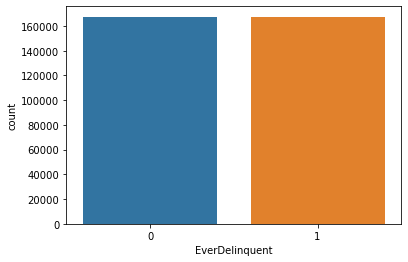

In [78]:
# visualize the target variable
g = sns.countplot(df_smote_over['EverDelinquent'])
g.set_xticklabels(['0','1'])
plt.show()

Now the data is balanced.

In [79]:
#Final check our dataset 
df_smote_over.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335060 entries, 0 to 335059
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CreditScore        335060 non-null  int32  
 1   IsFirstTime        335060 non-null  int32  
 2   MIP                335060 non-null  int32  
 3   OCLTV              335060 non-null  int32  
 4   DTI                335060 non-null  int32  
 5   LTV                335060 non-null  int32  
 6   OrigInterestRate   335060 non-null  float64
 7   PPM                335060 non-null  int32  
 8   OrigLoanTerm       335060 non-null  int32  
 9   NumBorrowers       335060 non-null  int32  
 10  MonthsInRepayment  335060 non-null  int32  
 11  CreditRange        335060 non-null  int32  
 12  LTV_range          335060 non-null  int32  
 13  Repay_range        335060 non-null  int32  
 14  EverDelinquent     335060 non-null  int32  
dtypes: float64(1), int32(14)
memory usage: 20.5 MB


In [80]:
df_smote_over.isnull()

,CreditScore,IsFirstTime,MIP,OCLTV,DTI,LTV,OrigInterestRate,PPM,OrigLoanTerm,NumBorrowers,MonthsInRepayment,CreditRange,LTV_range,Repay_range,EverDelinquent
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335055,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
335056,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
335057,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
335058,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Now Our dataset is balanced and Every column converted into a numeric value in our 'df_smote_over' dataframe,Now it's time to implement ML models.

# **Model Evaluation**

**Logistic Regression**

In [81]:
#Input and target variables
X=df_smote_over.drop('EverDelinquent',axis=1)
Y=df_smote_over.EverDelinquent

In [82]:
print(X.shape)
print(Y.shape)

(335060, 14)
(335060,)


In [83]:
#Training and test dataset split 80% training dataset and 20% testing dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=27)

In [84]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
scaler.fit(x_test)
x_test=scaler.transform(x_test)

In [85]:
print(x_train.shape)
print(x_test.shape)

(268048, 14)
(67012, 14)


In [86]:
print(y_train.shape)
print(y_test.shape)

(268048,)
(67012,)


In [87]:
#train the model on the training set
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [88]:
#make predictions on the testing set
y_pred = logreg.predict(x_test)

# compute classification accuracy for the logistic regression model
# compare actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.7140512147078135


In [89]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix")
confusion_matrix(y_test,y_pred)

Confusion Matrix


array([[24574,  8843],
       [10319, 23276]], dtype=int64)

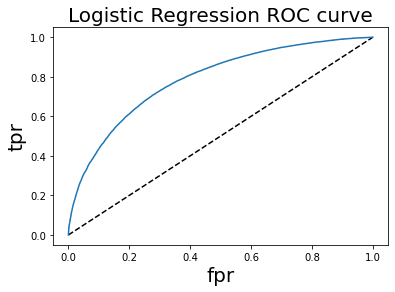

In [90]:
from sklearn.metrics import roc_curve
y_pred_prob = logreg.predict_proba(x_test)[:,1]
#False positive Rate,True positive Rate
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='lg')
plt.xlabel('fpr',fontsize=20)
plt.ylabel('tpr',fontsize=20)
plt.title('Logistic Regression ROC curve',fontsize=20)
plt.show()

In [91]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_prob)

0.7861719098754639

**KNN**

In [ ]:
#Input and target variables
X_knn=df_smote_over.drop('EverDelinquent',axis=1)
Y_knn=df_smote_over.EverDelinquent

In [ ]:
#Training and test dataset split 80% training dataset and 20% testing dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_knn,Y_knn,train_size=0.8,random_state=2)

**Find best value of K**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

error1= []
error2= []
for k in range(1,26):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred1= knn.predict(x_train)
    error1.append(np.mean(y_train!= y_pred1))
    y_pred2= knn.predict(x_test)
    error2.append(np.mean(y_test!= y_pred2))
# plt.figure(figsize(10,5))
plt.plot(range(1,26),error1,label="train")
plt.plot(range(1,26),error2,label="test")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()

we can minimum error in both testing and training dataset at k=1.

We can do data scaling as well for scale our data like Standard Scaler ,Max-Min Scaler and Robust Scaling in KNN

In [ ]:
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
#KNN with K=1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print("Acuracy Score")
print(metrics.accuracy_score(y_test, y_pred))
#Check performance using roc
print("ROC Score")
print(metrics.roc_auc_score(y_test, y_pred))
print("Confusion Matrix")
confusion_matrix(y_test,y_pred)

In [ ]:
#Confusion matrix can also be obtained using crosstab method of pandas.
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

In [ ]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

**ROC CURVE for k=1**

In [ ]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(x_test)[:,1]
#False positive Rate,True positive Rate
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=1) ROC curve')
plt.show()

In [ ]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

**KNN with K=5**

In [95]:
#KNN with K=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print("Acuracy Score")
print(metrics.accuracy_score(y_test, y_pred))
#Check performance using roc
print("ROC Accuracy Score")
print(metrics.roc_auc_score(y_test, y_pred))
print("Confusion Matrix")
confusion_matrix(y_test,y_pred)

Acuracy Score
0.7902763684116277
ROC Accuracy Score
0.7901257016767735
Confusion Matrix


array([[22600, 10862],
       [ 3192, 30358]], dtype=int64)

In [96]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.68      0.76     33462
           1       0.74      0.90      0.81     33550

    accuracy                           0.79     67012
   macro avg       0.81      0.79      0.79     67012
weighted avg       0.81      0.79      0.79     67012



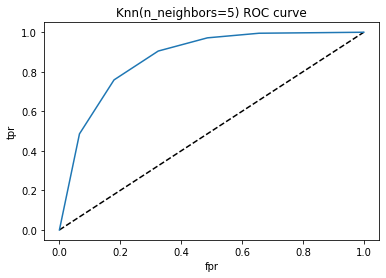

In [97]:
#ROC-Curve for k=5
from sklearn.metrics import roc_curve
y_pred_pro = knn.predict_proba(x_test)[:,1]
#False positive Rate,True positive Rate
fpr, tpr, thresholds = roc_curve(y_test, y_pred_pro)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=5) ROC curve')
plt.show()

In [107]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_pro)

0.869170574607351

In [108]:
# try K=1 through K=25 and record testing accuracy
k_range = range(1, 26)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

[0.8339849579179849, 0.821002208559661, 0.810153405360234, 0.8069450247716827, 0.7902763684116277, 0.7897093057959769, 0.7769205515430072, 0.7770100877454784, 0.7666686563600549, 0.7685936847131857, 0.7602369724825404, 0.7601175908792455, 0.75335760759267, 0.7534322210947293, 0.74776159493822, 0.7486868023637557, 0.7438220020294872, 0.7428818719035397, 0.7394645735092222, 0.7389572016952187, 0.735017608786486, 0.7341520921625977, 0.7313018563839312, 0.730212499253865, 0.7270339640661374]


Text(0, 0.5, 'Testing Accuracy')

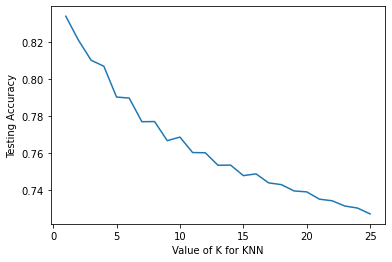

In [109]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [106]:
#Model Save

In [110]:
import pickle
file=open("knn.pkl", 'wb')
pickle.dump(knn, file)

**AT K=1 we achieve maximum test accuracy i.e 83.5%**

**In This Notebook we achieve max accuracy in KNN**

##**Thank You**